<a href="https://colab.research.google.com/github/jagdeeshgughalot/YOLO_V3_from_scratch_colab-master/blob/master/Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


###Here you need to load darknet & util modules  in addition to the pallete file

In [0]:
#@title Installing PyTorch 
!pip install torch==1.3.1
!wget https://raw.githubusercontent.com/AvivSham/YOLO_V3_from_scratch_colab/master/util.py
!wget https://raw.githubusercontent.com/AvivSham/YOLO_V3_from_scratch_colab/master/darknet.py
!wget https://raw.githubusercontent.com/AvivSham/YOLO_V3_from_scratch_colab/master/pallete
    

--2020-01-27 13:24:15--  https://raw.githubusercontent.com/AvivSham/YOLO_V3_from_scratch_colab/master/util.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7432 (7.3K) [text/plain]
Saving to: ‘util.py’

util.py             100%[===================>]   7.26K  --.-KB/s    in 0s      

2020-01-27 13:24:16 (103 MB/s) - ‘util.py’ saved [7432/7432]

--2020-01-27 13:24:18--  https://raw.githubusercontent.com/AvivSham/YOLO_V3_from_scratch_colab/master/darknet.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9451 (9.2K) [text/plain]
Saving to: ‘

In [0]:
#@title Import dependencies
from __future__ import division
import time
import torch 
import torch.nn as nn
from torch.autograd import Variable
import numpy as np
import cv2 
from util import *
import argparse
import os 
import os.path as osp
from darknet import *
import pickle as pkl
import pandas as pd
import random
import csv

In [0]:
#@title Get weights and graph file for the model

#Get weights file for the model
!wget https://pjreddie.com/media/files/yolov3.weights
# Get YOLO graph file
!wget https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg


--2020-01-27 13:25:09--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  23.2MB/s    in 11s     

2020-01-27 13:25:20 (21.6 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]

--2020-01-27 13:25:23--  https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8342 (8.1K) [text/plain]
Saving to: ‘yolov3.cfg’

yolov3.cfg          100%[===================>]   8.15K  --.-KB/s    in 0s      

2020

In [0]:
#@title Making directories for test photos
!mkdir Images
!mkdir Images_Detection

In [0]:
#@title Changing working directory
os.chdir(os.getcwd()+'/'+'Images')

In [0]:
#@title Test
os.getcwd()

'/content/Images'

In [0]:
#@title Get test images
!wget https://github.com/ayooshkathuria/pytorch-yolo-v3/raw/master/dog-cycle-car.png
!wget https://raw.githubusercontent.com/ayooshkathuria/YOLO_v3_tutorial_from_scratch/master/imgs/giraffe.jpg
!wget https://raw.githubusercontent.com/ayooshkathuria/YOLO_v3_tutorial_from_scratch/master/imgs/messi.jpg
!wget https://raw.githubusercontent.com/ayooshkathuria/YOLO_v3_tutorial_from_scratch/master/imgs/img1.jpg
!wget https://raw.githubusercontent.com/ayooshkathuria/YOLO_v3_tutorial_from_scratch/master/imgs/img2.jpg
!wget https://raw.githubusercontent.com/ayooshkathuria/YOLO_v3_tutorial_from_scratch/master/imgs/img3.jpg
!wget https://raw.githubusercontent.com/ayooshkathuria/YOLO_v3_tutorial_from_scratch/master/imgs/img4.jpg


--2020-01-27 13:26:32--  https://github.com/ayooshkathuria/pytorch-yolo-v3/raw/master/dog-cycle-car.png
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/ayooshkathuria/pytorch-yolo-v3/master/dog-cycle-car.png [following]
--2020-01-27 13:26:33--  https://raw.githubusercontent.com/ayooshkathuria/pytorch-yolo-v3/master/dog-cycle-car.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 347445 (339K) [image/png]
Saving to: ‘dog-cycle-car.png’

dog-cycle-car.png   100%[===================>] 339.30K  --.-KB/s    in 0.06s   

2020-01-27 13:26:34 (5.83 MB/s) - ‘dog-cycle-car.png’ saved [347445/347445]

--2020-0

In [0]:
%cd ..


/content


In [0]:
#@title Setting parameters


# images --> Input image / directory of images.
# reso   --> Input image resolution
# detect_image --> flag to decide to detect video or single photo

images = os.getcwd() + '/Images'
images_det = os.getcwd() + '/Images_Detection'
print(images, images_det)
batch_size = 1
confidence = 0.5
nms_thesh = 0.4
reso = 416
weights_file = "yolov3.weights"
config_file = "yolov3.cfg"
start = 0
detect_image = False
CUDA = torch.cuda.is_available()

/content/Images /content/Images_Detection


In [0]:
#@title Making directory for COCO names file
!mkdir data
os.chdir('./data')



In [0]:
#@title COCO names file
!wget https://raw.githubusercontent.com/ayooshkathuria/YOLO_v3_tutorial_from_scratch/master/data/coco.names

--2020-01-27 13:27:21--  https://raw.githubusercontent.com/ayooshkathuria/YOLO_v3_tutorial_from_scratch/master/data/coco.names
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 625 [text/plain]
Saving to: ‘coco.names’

coco.names          100%[===================>]     625  --.-KB/s    in 0s      

2020-01-27 13:27:22 (116 MB/s) - ‘coco.names’ saved [625/625]



In [0]:
def load_classes(namefile):
  fp = open(namefile, 'r')
  names = fp.read().split("\n")[:-1] #discard the last
  return names

In [0]:
# COCO dataset has 80 different classes
num_classes = 80
classes = load_classes("coco.names")

In [0]:
%cd ..

/content


In [0]:
def write_video_box(x, results):
  c1 = tuple(x[1:3].int())
  c2 = tuple(x[3:5].int())
  img = results
  cls = int(x[-1])
  color = random.choice(colors)
  label = "{0}".format(classes[cls])
  cv2.rectangle(img, c1, c2,color, 1)
  t_size = cv2.getTextSize(label, cv2.FONT_HERSHEY_PLAIN, 1 , 1)[0]
  c2 = c1[0] + t_size[0] + 3, c1[1] + t_size[1] + 4
  cv2.rectangle(img, c1, c2,color, -1)
  cv2.putText(img, label, (c1[0], c1[1] + t_size[1] + 4), cv2.FONT_HERSHEY_PLAIN, 1, [225,255,255], 1);
  return img

In [0]:
# Set up the network
print("Loading network...")
model = Darknet(config_file)
model.load_weights(weights_file)
print("Network successfully loaded")


model.net_info["height"] = reso
inp_dim = int(model.net_info["height"])
assert inp_dim % 32 == 0
assert inp_dim > 32

# if GPU is available allocate the model
if CUDA:
  model.cuda()
  
# Set the model in evaluation mode
model.eval()

if detect_image:
  read_dir = time.time()
  #Detection phase
  try:
      imlist = [osp.join(osp.realpath('.'), images, img) for img in os.listdir(images)]
  except NotADirectoryError:
      imlist = []
      imlist.append(osp.join(osp.realpath('.'), images))
  except FileNotFoundError:
      print ("No file or directory with the name {}".format(images))
      exit()

  if not os.path.exists(images_det):
      os.makedirs(images_det)

  load_batch = time.time()
  loaded_ims = [cv2.imread(x) for x in imlist]

  im_batches = list(map(prep_image, loaded_ims, [inp_dim for x in range(len(imlist))]))
  im_dim_list = [(x.shape[1], x.shape[0]) for x in loaded_ims]
  im_dim_list = torch.FloatTensor(im_dim_list).repeat(1,2)


  leftover = 0
  if (len(im_dim_list) % batch_size):
      leftover = 1

  if batch_size != 1:
      num_batches = len(imlist) // batch_size + leftover            
      im_batches = [torch.cat((im_batches[i*batch_size : min((i +  1)*batch_size,
                          len(im_batches))]))  for i in range(num_batches)]  

  write = 0


  if CUDA:
      im_dim_list = im_dim_list.cuda()

  start_det_loop = time.time()
  for i, batch in enumerate(im_batches):
  #load the image 
      start = time.time()
      if CUDA:
          batch = batch.cuda()
      with torch.no_grad():
          prediction = model(Variable(batch), CUDA)

      prediction = write_results(prediction, confidence, num_classes, nms_conf = nms_thesh)

      end = time.time()

      if type(prediction) == int:

          for im_num, image in enumerate(imlist[i*batch_size: min((i +  1)*batch_size, len(imlist))]):
              im_id = i*batch_size + im_num
              print("{0:20s} predicted in {1:6.3f} seconds".format(image.split("/")[-1], (end - start)/batch_size))
              print("{0:20s} {1:s}".format("Objects Detected:", ""))
              print("----------------------------------------------------------")
          continue

      prediction[:,0] += i*batch_size    #transform the atribute from index in batch to index in imlist 

      if not write:                      #If we have't initialised output
          output = prediction  
          write = 1
      else:
          output = torch.cat((output,prediction))

      for im_num, image in enumerate(imlist[i*batch_size: min((i +  1)*batch_size, len(imlist))]):
          im_id = i*batch_size + im_num
          objs = [classes[int(x[-1])] for x in output if int(x[0]) == im_id]
          print("{0:20s} predicted in {1:6.3f} seconds".format(image.split("/")[-1], (end - start)/batch_size))
          print("{0:20s} {1:s}".format("Objects Detected:", " ".join(objs)))
          print("----------------------------------------------------------")

      if CUDA:
          torch.cuda.synchronize()       
  try:
      output
  except NameError:
      print ("No detections were made")
      exit()

  im_dim_list = torch.index_select(im_dim_list, 0, output[:,0].long())

  scaling_factor = torch.min(416/im_dim_list,1)[0].view(-1,1)


  output[:,[1,3]] -= (inp_dim - scaling_factor*im_dim_list[:,0].view(-1,1))/2
  output[:,[2,4]] -= (inp_dim - scaling_factor*im_dim_list[:,1].view(-1,1))/2



  output[:,1:5] /= scaling_factor

  for i in range(output.shape[0]):
      output[i, [1,3]] = torch.clamp(output[i, [1,3]], 0.0, im_dim_list[i,0])
      output[i, [2,4]] = torch.clamp(output[i, [2,4]], 0.0, im_dim_list[i,1])


  output_recast = time.time()
  class_load = time.time()
  colors = pkl.load(open("pallete", "rb"))

  draw = time.time()
  
  list(map(lambda x: write_box(x, loaded_ims), output))

  det_names = pd.Series(imlist).apply(lambda x: "{}/det_{}".format(images_det,x.split("/")[-1]))

  list(map(cv2.imwrite, det_names, loaded_ims))


  end = time.time()

  print("SUMMARY")
  print("----------------------------------------------------------")
  print("{:25s}: {}".format("Task", "Time Taken (in seconds)"))
  print()
  print("{:25s}: {:2.3f}".format("Reading addresses", load_batch - read_dir))
  print("{:25s}: {:2.3f}".format("Loading batch", start_det_loop - load_batch))
  print("{:25s}: {:2.3f}".format("Detection (" + str(len(imlist)) +  " images)", output_recast - start_det_loop))
  print("{:25s}: {:2.3f}".format("Output Processing", class_load - output_recast))
  print("{:25s}: {:2.3f}".format("Drawing Boxes", end - draw))
  print("{:25s}: {:2.3f}".format("Average time_per_img", (end - load_batch)/len(imlist)))
  print("----------------------------------------------------------")


  torch.cuda.empty_cache()

else:
  #Detection phase
  #Use cv2.VideoCapture('your video file name or path')
  cap = cv2.VideoCapture('Dedication - Short Film.mp4') #cap = cv.VideoCapture(0)
  
  fps = cap.get(cv2.CAP_PROP_FPS)
  sz = (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)),
       int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))
  fourcc = cv2.VideoWriter_fourcc(*'DIVX')
  vout = cv2.VideoWriter()
  vout.open('./video_output.avi',fourcc,fps,sz,True)

  
#assert cap.isOpened(), 'Cannot capture source'

  frames = 0 
  start = time.time()

videoPath = '/content/drive/My Drive/colab-yolo/walking.mp4'
cap = cv2.VideoCapture(videoPath)
font = cv2.FONT_HERSHEY_PLAIN
starting_time = time.time()
frame_id = 0


while True:
      ret, frame = cap.read()

      if ret:   
          img = prep_image(frame, inp_dim)
          im_dim = frame.shape[1], frame.shape[0]
          im_dim = torch.FloatTensor(im_dim).repeat(1,2)   

          if CUDA:
              im_dim = im_dim.cuda()
              img = img.cuda()

          with torch.no_grad():
              output = model(Variable(img, volatile = True), CUDA)
          output = write_results(output, confidence, num_classes, nms_conf = nms_thesh)


          if type(output) == int:
              frames += 1
              key = cv2.waitKey(1)
              if key & 0xFF == ord('q'):
                  break
              continue

          im_dim = im_dim.repeat(output.size(0), 1)
          scaling_factor = torch.min(416/im_dim,1)[0].view(-1,1)

          output[:,[1,3]] -= (inp_dim - scaling_factor*im_dim[:,0].view(-1,1))/2
          output[:,[2,4]] -= (inp_dim - scaling_factor*im_dim[:,1].view(-1,1))/2

          output[:,1:5] /= scaling_factor

          for i in range(output.shape[0]):
              output[i, [1,3]] = torch.clamp(output[i, [1,3]], 0.0, im_dim[i,0])
              output[i, [2,4]] = torch.clamp(output[i, [2,4]], 0.0, im_dim[i,1])


          classes = load_classes('data/coco.names')
          colors = pkl.load(open("pallete", "rb"))

          list(map(lambda x: write_video_box(x, frame), output))
          
          vout.write(frame)
          
          key = cv2.waitKey(1)
          if key & 0xFF == ord('q'):
              FPS = frames // (time.time() - start)
              break
          frames += 1
          
      else:
          FPS = frames // (time.time() - start)
          break
  

Loading network...
Network successfully loaded


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:187: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2494: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


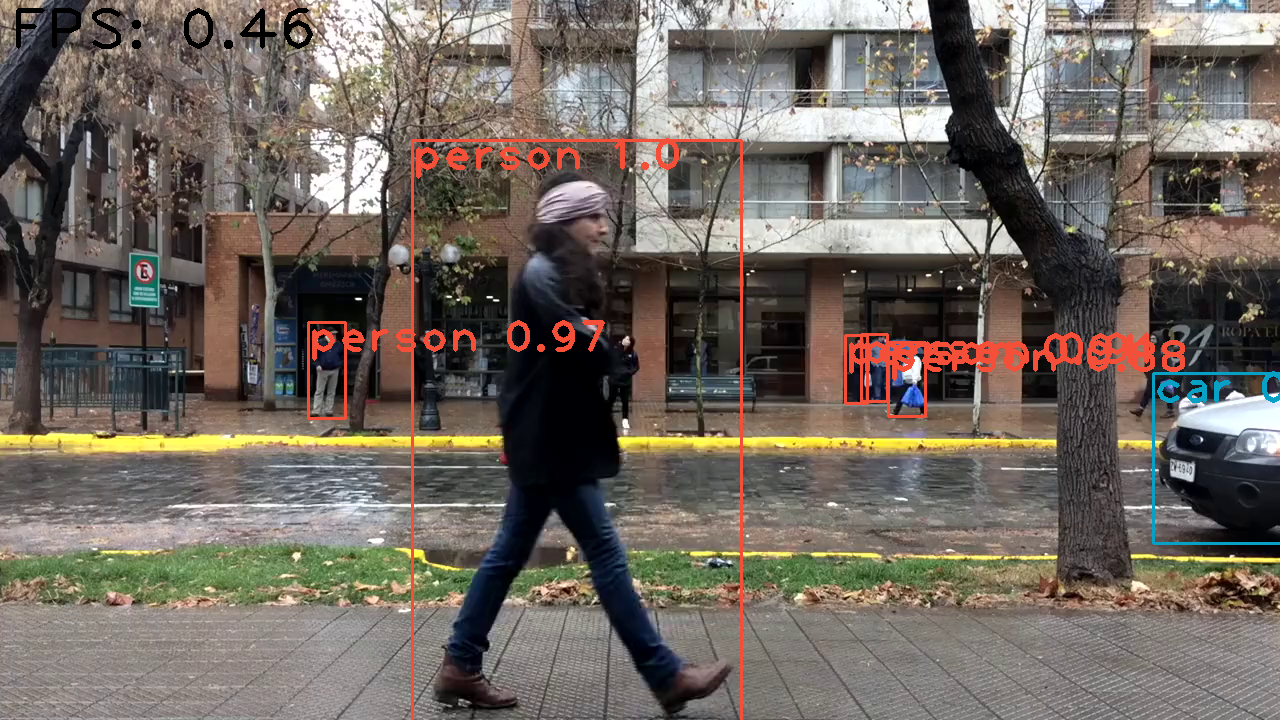

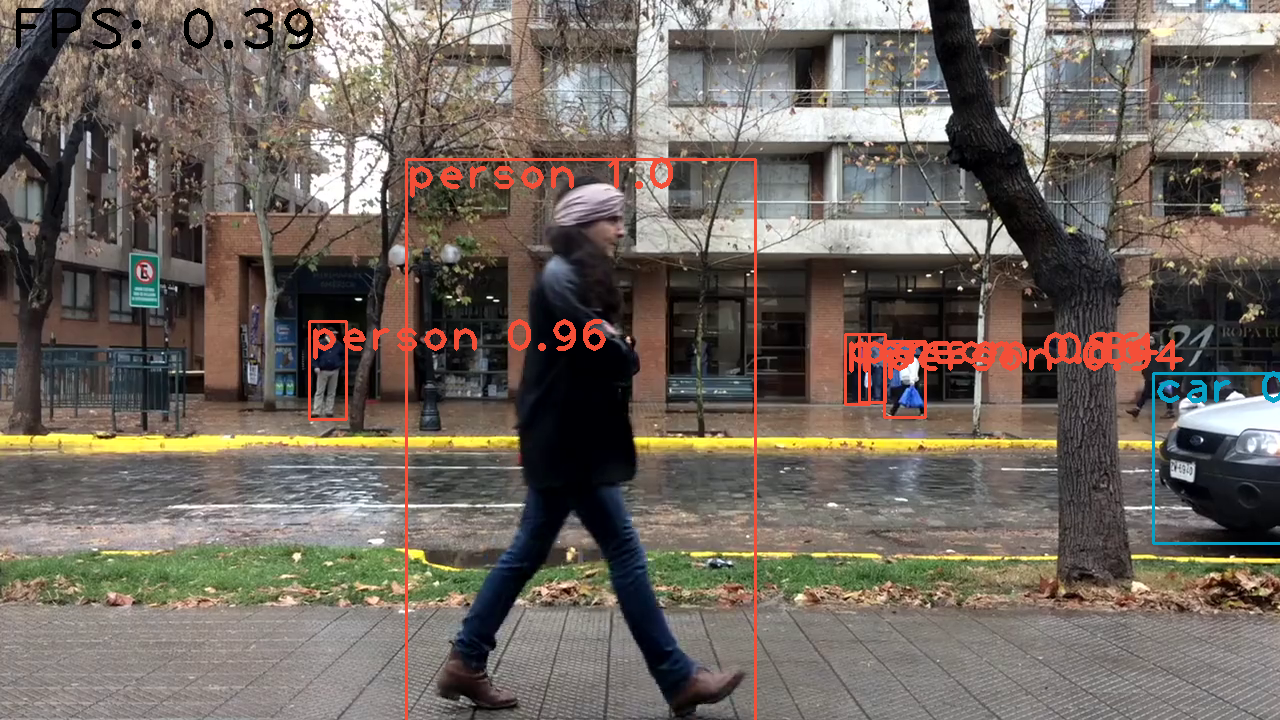

In [0]:
import cv2
import numpy as np
import time
from google.colab.patches import cv2_imshow

# Load Yolo
net = cv2.dnn.readNet("/content/yolov3.weights", "/content/yolov3.cfg")
classes = []
with open("/content/data/coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]
layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
colors = np.random.uniform(0, 255, size=(len(classes), 3))


videoPath = '/content/drive/My Drive/colab-yolo/walking.mp4'
cap = cv2.VideoCapture(videoPath)
font = cv2.FONT_HERSHEY_PLAIN
starting_time = time.time()
frame_id = 0
while True:
    _, frame = cap.read()
    frame_id += 1

    height, width, channels = frame.shape

    # Detecting objects
    blob = cv2.dnn.blobFromImage(frame, 0.00392, (416, 416), (0, 0, 0), True, crop=False)

    net.setInput(blob)
    outs = net.forward(output_layers)

    # Showing informations on the screen
    class_ids = []
    confidences = []
    boxes = []
    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.2:
                # Object detected
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)

                # Rectangle coordinates
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)

                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.8, 0.3)

    for i in range(len(boxes)):
        if i in indexes:
            x, y, w, h = boxes[i]
            label = str(classes[class_ids[i]])
            confidence = confidences[i]
            color = colors[class_ids[i]]
            cv2.rectangle(frame, (x, y), (x + w, y + h), color, 2)
            cv2.putText(frame, label + " " + str(round(confidence, 2)), (x, y + 30), font, 3, color, 3)



    elapsed_time = time.time() - starting_time
    fps = frame_id / elapsed_time
    cv2.putText(frame, "FPS: " + str(round(fps, 2)), (10, 50), font, 4, (0, 0, 0), 3)
    cv2_imshow(frame)
    key = cv2.waitKey(1)
    if key == 27:
        break

cap.release()
cv2.destroyAllWindows()